# Final Exam - Data Mining
Name: Low Tsu Siang

Matrix Number: WQD180072

New Study ID: 17051570

### Question 1
You are required  to make a user-agent that will crawl the WWW (your familiar domain)  to produce dataset of a particular website. 

- the web site can be as simple as a list of webpages and what other pages they link to

- the output does not need to be in XHTML (or HTML) form a multi-stage approach (e.g. produce the xhtml or html  in csv format  )        



In [1]:
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import pandas as pd
import re

### Background
This analysis is to examine the factors of building a winning EPL team. The Premier League, often referred to as the English Premier League or the EPL outside England, is the top level of the English football league system. Contested by 20 clubs. 

The EPL team will be divided in the 5 categories according the team points. 

##### Extract main dataframe
The main dataframe will consists of team name in EPL, team's manager & team's captain. The information is extracted from wikipedia page. All the information is stored as "df" dataframe

In [2]:
my_url= "https://en.wikipedia.org/wiki/2019%E2%80%9320_Premier_League"
page_html = urllib.request.urlopen(my_url)
page_soup = soup(page_html, "lxml")

In [3]:
# Focus on retrieving data from the main table
right_table=page_soup.find_all('table')                           
r_table = right_table[2].tbody
#rows
##Strap every role of the tables
rows = r_table.find_all('tr')
#rows[1]
###To extract & examine the data for signal row aka country (testpoint)
team = rows[2].find_all('td')
#team

In [4]:
# Extract the website table header name
mcolumns = [v.text.replace('\n','') for v in rows[0].find_all('th')]
mcolumns.remove('Shirt sponsor (sleeve)')
mcolumns.remove('Shirt sponsor (chest)')

In [5]:
## Rename columns to shortform
maindf=[]
maindf = pd.DataFrame(columns = mcolumns)
maindf

,Team,Manager,Captain,Kit manufacturer


In [6]:
##row 0 is the table header. Value collection start at row 1
right_table=page_soup.find_all('table')
r_table = right_table[2].tbody
rows = r_table.find_all('tr')
for i in range (1, len(rows)):
    tds = rows[i].find_all('td')
    values = [tds[0].text.replace('\n',''), tds[1].text.replace('\n',''), tds[2].text.replace('\n',''), 
                  tds[3].text.replace('\n','')]

##Use break function to examine the for loop at initial stage (Checkpoint)
#    break
    maindf = maindf.append(pd.Series(values, index=mcolumns),ignore_index=True)
#print(maindf)

                       Team               Manager                     Captain  \
0                   Arsenal          Mikel Arteta   Pierre-Emerick Aubameyang   
1               Aston Villa            Dean Smith               Jack Grealish   
2               Bournemouth            Eddie Howe               Simon Francis   
3    Brighton & Hove Albion         Graham Potter                  Lewis Dunk   
4                   Burnley            Sean Dyche                     Ben Mee   
5                   Chelsea         Frank Lampard           César Azpilicueta   
6            Crystal Palace           Roy Hodgson            Luka Milivojević   
7                   Everton       Carlo Ancelotti              Séamus Coleman   
8            Leicester City       Brendan Rodgers           Kasper Schmeichel   
9                 Liverpool          Jürgen Klopp            Jordan Henderson   
10          Manchester City         Pep Guardiola                 David Silva   
11        Manchester United 

##### EPL Standings Board
EPL Standings Board can be extracted from the same wikipedia page. The aim is to extract all the information on the EPL standing baord. After the web scrawling, the information is stored in "pointdf" dataframe. The main information of this dataframe is the Points for each time. This is the labelled variable of this analysis

In [7]:
right_table=page_soup.find_all('table')
r_table2 = right_table[4].tbody
rows2 = r_table2.find_all('tr')
pcolumns = [v.text.replace('\n','') for v in rows2[0].find_all('th')]
pcolumns.remove('Qualification or relegation')
pcolumns.remove('Pos')
pcolumns = ['Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']

In [8]:
## Rename columns to shortform
#newcolumns = ['Rank','Country','Elec_Consp','Data_Yr','Source','Population','As_of','Avg_Elec_kWh','Avg_Elec_W']
pointdf=[]
pointdf = pd.DataFrame(columns = pcolumns)
pointdf

,Team,Pld,W,D,L,GF,GA,GD,Pts


In [9]:
##row 0 is the table header. Value collection start at row 1
for i in range (1, len(rows)):
    tds = rows2[i].find_all('td')
    pvalues = [tds[0].text.replace('\n',''), tds[1].text.replace('\n',''), tds[2].text.replace('\n',''), 
               tds[3].text.replace('\n',''),tds[4].text.replace('\n',''),tds[5].text.replace('\n',''), 
               tds[6].text.replace('\n',''),tds[7].text.replace('\n',''),tds[8].text.replace('\n','')]

##Use break function to examine the for loop at initial stage (Checkpoint)
#    break
    pointdf = pointdf.append(pd.Series(pvalues, index=pcolumns),ignore_index=True)
print(pointdf)

                       Team Pld   W   D   L  GF  GA   GD Pts
0          Liverpool (C, Q)  31  28   2   1  70  21  +49  86
1        Manchester City[a]  31  20   3   8  77  33  +44  63
2            Leicester City  32  16   7   9  60  31  +29  55
3                   Chelsea  32  16   6  10  57  44  +13  54
4         Manchester United  32  14  10   8  51  31  +20  52
5   Wolverhampton Wanderers  32  13  13   6  45  34  +11  52
6          Sheffield United  32  12  11   9  33  32   +1  47
7                   Arsenal  32  11  13   8  47  41   +6  46
8         Tottenham Hotspur  32  12   9  11  51  44   +7  45
9                   Burnley  32  13   6  13  36  45   −9  45
10                  Everton  32  12   8  12  40  47   −7  44
11           Crystal Palace  32  11   9  12  28  37   −9  42
12         Newcastle United  32  11   9  12  33  43  −10  42
13              Southampton  32  12   4  16  41  55  −14  40
14   Brighton & Hove Albion  32   7  12  13  34  44  −10  33
15          West Ham Uni

##### Manager Data
Manager data can be extracted from wikipedia page. Each manager name in wikipedia table consists of the hyperlink of manager profile. By extracting the "href" information, I can get the url for each manager profile website. ALl the information is stored under "managerdf" dataframe


In [10]:
## Test Point
## Extract the wikipedia url for each manager
manager_url ='https://en.wikipedia.org'+team[1] .find('span',{'class':'vcard'}).a['href']
#manager_url
manager_html = urllib.request.urlopen(manager_url)
manager_soup = soup(manager_html, "lxml")

In [11]:
def managerage(couch_url):
    manager_html = urllib.request.urlopen(manager_url)
    manager_soup = soup(manager_html, "lxml")
    c_table=manager_soup.find('table', {'class':'infobox vcard'}).tbody
    age = c_table.find('span',{'class':'noprint ForceAgeToShow'}).text.replace('age\xa0','') 
    return age

def managername(couch_url):
    manager_html = urllib.request.urlopen(manager_url)
    manager_soup = soup(manager_html, "lxml")
    c_table=manager_soup.find('table', {'class':'infobox vcard'}).tbody
    c_table=manager_soup.find('table', {'class':'infobox vcard'})
    name = c_table.span.text
    return name  

In [12]:
managerdf=[]
ccolumns = ['Manager','Age']
managerdf = pd.DataFrame(columns = ccolumns)
for i in range (1, len(rows)):
    cteam = rows[i].find_all('td')
    manager_url ='https://en.wikipedia.org'+cteam[1] .find('span',{'class':'vcard'}).a['href']
    value1 = cteam[1].text.replace('\n','')
    value2 = managerage(manager_url)
    #print(value1, value2)
    #break
    cvalues = [value1, value2]
    managerdf = managerdf.append(pd.Series(cvalues,index=ccolumns),ignore_index=True)

##### Captain Data
Captain data can be extracted from wikipedia page. Each captain name in wikipedia table consists of the hyperlink of captain profile. By extracting the "href" information, I can get the url for each captain profile website. All information is stored under "capdf" dataframe

In [119]:
## Test Point
## Extract the wikipedia url for each team's Captain
cap_url ='https://en.wikipedia.org'+team[2] .find('span',{'class':'vcard'}).a['href']
cap_url
cap_html = urllib.request.urlopen(cap_url)
cap_soup = soup(cap_html, "lxml")
## Checkpoint
#cap_soup.find('td',{'class':'birthplace'}).a['title']

In [15]:
def capage(cap_url):
    cap_html = urllib.request.urlopen(cap_url)
    cap_soup = soup(cap_html, "lxml")
    c_table=cap_soup.find('table', {'class':'infobox vcard'}).tbody
    age = c_table.find('span',{'class':'noprint ForceAgeToShow'}).text.replace('age\xa0','') 
    return age

def cappos(cap_url):
    cap_html = urllib.request.urlopen(cap_url)
    cap_soup = soup(cap_html, "lxml")
    c_table=cap_soup.find('table', {'class':'infobox vcard'}).tbody
    pos = cap_soup.find('td',{'class':'role'}).a['title'] 
    return pos

def capbirth(cap_url):
    cap_html = urllib.request.urlopen(cap_url)
    cap_soup = soup(cap_html, "lxml")
    c_table=cap_soup.find('table', {'class':'infobox vcard'}).tbody
    birth = cap_soup.find('td',{'class':'birthplace'}).a['title']
    return birth

In [120]:
capdf=[]
capcolumns = ['Captain','Age','Pos','BirthPlace']
capdf = pd.DataFrame(columns = capcolumns)
for i in range (1, len(rows)):
    capteam = rows[i].find_all('td')
    cap_url ='https://en.wikipedia.org'+capteam[2].find('span',{'class':'vcard'}).a['href']
    value1 = capteam[2].text.replace('\n','')
    value2 = capage(cap_url)
    value3 = cappos(cap_url)
    value4 = capbirth(cap_url)
    ## Checkpoint
    print(value1, value2, value3, value4)
    break
    cvalues = [value1, value2, value3, value4]
    capdf = capdf.append(pd.Series(cvalues,index=capcolumns),ignore_index=True)

AttributeError: ResultSet object has no attribute 'find'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [17]:
capdf

,Captain,Age,Pos,BirthPlace
0,Pierre-Emerick Aubameyang,(31),Forward (association football),"Laval, Mayenne"
1,Jack Grealish,(24),Midfielder,Birmingham
2,Simon Francis,(35),Defender (association football),Nottingham
3,Lewis Dunk,(28),Centre back,Brighton
4,Ben Mee,(30),Defender (association football),"Sale, Greater Manchester"
5,César Azpilicueta,(30),Defender (association football),Pamplona
6,Luka Milivojević,(29),Midfielder,Kragujevac
7,Séamus Coleman,(31),Defender (association football),Killybegs
8,Kasper Schmeichel,(33),Goalkeeper (association football),Copenhagen
9,Jordan Henderson,(30),Midfielder,Sunderland


Data Cleaning & Transformation

In [18]:
maindf.head()

,Team,Manager,Captain,Kit manufacturer
0,Arsenal,Mikel Arteta,Pierre-Emerick Aubameyang,Adidas[59]
1,Aston Villa,Dean Smith,Jack Grealish,Kappa[62]
2,Bournemouth,Eddie Howe,Simon Francis,Umbro[65]
3,Brighton & Hove Albion,Graham Potter,Lewis Dunk,Nike[67]
4,Burnley,Sean Dyche,Ben Mee,Umbro


In [19]:
managerdf.head()

,Manager,Age
0,Mikel Arteta,(38)
1,Dean Smith,(49)
2,Eddie Howe,(42)
3,Graham Potter,(45)
4,Sean Dyche,(49)


In [20]:
managerdf['Age'] = managerdf['Age'].replace(r'[^\d\.]+', '', regex=True).apply(pd.to_numeric, errors='coerce')

In [21]:
test = pointdf[:1] 
test['Team'] = test['Team'].str.split(' ').str[0]
pointdf[:1] = test
print(pointdf)

                       Team Pld   W   D   L  GF  GA   GD Pts
0                 Liverpool  31  28   2   1  70  21  +49  86
1        Manchester City[a]  31  20   3   8  77  33  +44  63
2            Leicester City  32  16   7   9  60  31  +29  55
3                   Chelsea  32  16   6  10  57  44  +13  54
4         Manchester United  32  14  10   8  51  31  +20  52
5   Wolverhampton Wanderers  32  13  13   6  45  34  +11  52
6          Sheffield United  32  12  11   9  33  32   +1  47
7                   Arsenal  32  11  13   8  47  41   +6  46
8         Tottenham Hotspur  32  12   9  11  51  44   +7  45
9                   Burnley  32  13   6  13  36  45   −9  45
10                  Everton  32  12   8  12  40  47   −7  44
11           Crystal Palace  32  11   9  12  28  37   −9  42
12         Newcastle United  32  11   9  12  33  43  −10  42
13              Southampton  32  12   4  16  41  55  −14  40
14   Brighton & Hove Albion  32   7  12  13  34  44  −10  33
15          West Ham Uni

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
pointdf = pointdf.rename(columns={'Team[ vte ]':'Team'})
#pointdf['Team'] = pointdf['Team'].str.split('(').str[0]
#pointdf['Team'] = pointdf['Team'].str.replace('()', '')
pointdf['Team'] = pointdf['Team'].str.split('[').str[0]
pointC = ('Pld', 'W', 'D', 'L', 'GF', 'GA', 'Pts')
for i in pointC:
    pointdf[i] = pointdf[i].astype(int)

In [82]:
print(pointdf)

                       Team  Pld   W   D   L  GF  GA   GD  Pts
0                 Liverpool   31  28   2   1  70  21  +49   86
1           Manchester City   31  20   3   8  77  33  +44   63
2            Leicester City   31  16   7   8  59  29  +30   55
3                   Chelsea   31  16   6   9  55  41  +14   54
4   Wolverhampton Wanderers   32  13  13   6  45  34  +11   52
5         Manchester United   31  13  10   8  48  31  +17   49
6         Tottenham Hotspur   31  12   9  10  50  41   +9   45
7          Sheffield United   31  11  11   9  30  31   −1   44
8                   Arsenal   31  10  13   8  43  41   +2   43
9            Crystal Palace   31  11   9  11  28  36   −8   42
10                  Burnley   31  12   6  13  35  45  −10   42
11                  Everton   31  11   8  12  38  46   −8   41
12              Southampton   32  12   4  16  41  55  −14   40
13         Newcastle United   31  10   9  12  29  42  −13   39
14   Brighton & Hove Albion   31   7  12  12  34  41   

In [23]:
## Divide Point into 4 category
def group(pts):
    if pts < 30:
        value = 1
        return value
    elif 30 <= pts and pts < 50:
        value = 2
        return value
    else:
        value = 3
        return value

In [24]:
pointdf['PtsCat'] = pointdf['Pts'].map(group)

In [25]:
pointdf

,Team,Pld,W,D,L,GF,GA,GD,Pts,PtsCat
0,Liverpool,31,28,2,1,70,21,+49,86,3
1,Manchester City,31,20,3,8,77,33,+44,63,3
2,Leicester City,32,16,7,9,60,31,+29,55,3
3,Chelsea,32,16,6,10,57,44,+13,54,3
4,Manchester United,32,14,10,8,51,31,+20,52,3
5,Wolverhampton Wanderers,32,13,13,6,45,34,+11,52,3
6,Sheffield United,32,12,11,9,33,32,+1,47,2
7,Arsenal,32,11,13,8,47,41,+6,46,2
8,Tottenham Hotspur,32,12,9,11,51,44,+7,45,2
9,Burnley,32,13,6,13,36,45,−9,45,2


In [26]:
capdf['Age'] = capdf['Age'].replace(r'[^\d\.]+', '', regex=True).apply(pd.to_numeric, errors='coerce')
capdf['Pos'] = capdf['Pos'].str.strip('(association football)')


In [27]:
def grouppos(pos):
    pos = pos.lower()
    if 'goalkeeper' in pos:
        value = 0
        return value
    elif 'back' in pos or 'defender' in pos:
        value = 1
        return value
    elif "midfielder" in pos:
        value = 2
        return value
    elif 'forward' in pos or 'striker' in pos:
        value = 3
        return value

In [28]:
capdf['PosCat'] = capdf['Pos'].map(grouppos)

In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import sys, getopt
import csv
url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
res = requests.get(url)
## The next two lines get around the issue with comments breaking the parsing.
comm = re.compile("<!--|-->")
soup = BeautifulSoup(comm.sub("",res.text),'lxml')
all_tables4 = soup.findAll("tbody")

In [31]:
##Squad Standard Stats
column11 = ['Team', 'Pl', 'Poss', 'Gls', 'Ast', 'PK', 'CrdY', 'CrdR']
df11 = []
df11 = pd.DataFrame(columns = column11)
rows11 = all_tables4[2].find_all('tr')
for i in range(0, len(rows11)):
    Team = rows11[i].th.text
    Pl = rows11[i].find('td',{'data-stat':'players_used'}).text
    Poss = rows11[i].find('td',{'data-stat':'possession'}).text
    Gls = rows11[i].find('td',{'data-stat':'goals'}).text
    Ast = rows11[i].find('td',{'data-stat':'assists'}).text
    PK = rows11[i].find('td',{'data-stat':'pens_made'}).text
    CrdY= rows11[i].find('td',{'data-stat':'cards_yellow'}).text
    CrdR = rows11[i].find('td',{'data-stat':'cards_red'}).text
    values11 = [Team, Pl, Poss, Gls, Ast, PK, CrdY, CrdR]
#    print(values11)
    df11 = df11.append(pd.Series(values11,index=column11),ignore_index=True)
print(df11)


               Team  Pl  Poss Gls Ast PK CrdY CrdR
0           Arsenal  29  54.8  47  29  2   70    4
1       Aston Villa  28  45.2  35  28  1   61    1
2       Bournemouth  27  45.5  29  19  1   69    3
3          Brighton  25  54.0  30  20  1   51    2
4           Burnley  22  40.3  35  25  2   61    0
5           Chelsea  27  60.0  57  37  6   56    0
6    Crystal Palace  24  44.2  26  18  3   51    1
7           Everton  23  48.9  38  28  1   63    3
8    Leicester City  21  57.7  58  42  5   37    1
9         Liverpool  24  63.4  68  56  5   28    1
10  Manchester City  23  66.2  77  56  5   58    4
11   Manchester Utd  28  55.6  50  34  7   59    0
12    Newcastle Utd  27  37.9  33  25  0   56    3
13     Norwich City  28  50.2  24  17  2   58    1
14    Sheffield Utd  25  43.9  27  18  1   54    2
15      Southampton  24  47.9  41  24  1   45    4
16        Tottenham  29  52.7  47  32  3   67    3
17          Watford  26  42.6  28  19  4   68    3
18         West Ham  28  43.2  

In [35]:
##Squad Goalkeeping
#all_tables[3]
column12 = ['Team', 'GA', 'SoTA', 'Saves', 'CS']
df12 = []
df12 = pd.DataFrame(columns = column12)
rows12 = all_tables4[3].find_all('tr')
for i in range(0, len(rows12)):
    Team = rows12[i].th.text
    GA = rows12[i].find('td',{'data-stat':'goals_against_gk'}).text
    SoTA = rows12[i].find('td',{'data-stat':'shots_on_target_against'}).text
    Saves = rows12[i].find('td',{'data-stat':'saves'}).text
    CS = rows12[i].find('td',{'data-stat':'clean_sheets'}).text
    values12 = [Team, GA, SoTA, Saves, CS]
#    print(values12)
#    break
    df12 = df12.append(pd.Series(values12,index=column12),ignore_index=True)
print(df12)

               Team  GA SoTA Saves  CS
0           Arsenal  41  158   119   9
1       Aston Villa  60  159   103   5
2       Bournemouth  54  153   103   4
3          Brighton  44  141   102   7
4           Burnley  45  133    91  13
5           Chelsea  44   96    57   6
6    Crystal Palace  37  139   103  10
7           Everton  47  125    81   8
8    Leicester City  31  110    85  11
9         Liverpool  21   87    65  14
10  Manchester City  33   92    61  12
11   Manchester Utd  31  107    77  10
12    Newcastle Utd  43  156   113  10
13     Norwich City  60  165   108   5
14    Sheffield Utd  31  117    86  11
15      Southampton  55  142    91   7
16        Tottenham  41  145   109   5
17          Watford  49  134    90   9
18         West Ham  56  157   109   6
19           Wolves  34  105    71  11


In [37]:
##Squad Shooting
##all_tables[5]
rows13 = all_tables4[5].find_all('tr')
column13 = ['Team', 'PK', 'Sh', 'SoT', 'FK']
df13 = []
df13 = pd.DataFrame(columns = column13)
for i in range(0, len(rows13)):
    Team = rows13[i].th.text
    PK = rows13[i].find('td',{'data-stat':'pens_made'}).text
    Sh = rows13[i].find('td',{'data-stat':'shots_total'}).text
    SoT = rows13[i].find('td',{'data-stat':'shots_on_target'}).text
    FK = rows13[i].find('td',{'data-stat':'shots_free_kicks'}).text
    values13 = [Team, PK, Sh, SoT, FK]
#    print(values13)
#    break
    df13 = df13.append(pd.Series(values13,index=column13),ignore_index=True)
print(df13)

               Team PK   Sh  SoT  FK
0           Arsenal  2  348  123  16
1       Aston Villa  1  386  125  13
2       Bournemouth  1  323   97  19
3          Brighton  1  398  124  11
4           Burnley  2  316  104  16
5           Chelsea  6  527  178  20
6    Crystal Palace  3  311   96  12
7           Everton  1  410  139  17
8    Leicester City  5  440  152  16
9         Liverpool  5  477  177  15
10  Manchester City  5  577  197  22
11   Manchester Utd  7  456  171  28
12    Newcastle Utd  0  335  110  12
13     Norwich City  2  360  112  14
14    Sheffield Utd  1  303   91   4
15      Southampton  1  417  142  23
16        Tottenham  3  372  132  16
17          Watford  4  347   96  15
18         West Ham  3  326  133  10
19           Wolves  3  394  122  11


In [39]:
##Squad Passing
##all_tables[6]
rows14 = all_tables4[6].find_all('tr')
column14 = ['Team', 'Cmp', 'Att', 'CmpPert', 'TotDist', 'PrgDist']
df14 = []
df14 = pd.DataFrame(columns = column14)
for i in range(0, len(rows14)):
    Team = rows14[i].th.text
    Cmp = rows14[i].find('td',{'data-stat':'passes_completed'}).text
    Att = rows14[i].find('td',{'data-stat':'passes'}).text
    CmpPert = rows14[i].find('td',{'data-stat':'passes_pct'}).text
    TotDist = rows14[i].find('td',{'data-stat':'passes_total_distance'}).text
    PrgDist = rows14[i].find('td',{'data-stat':'passes_progressive_distance'}).text
    values14 = [Team, Cmp, Att, CmpPert, TotDist, PrgDist]
#    print(values14)
#    break
    df14 = df14.append(pd.Series(values14,index=column14),ignore_index=True)
print(df14)


               Team    Cmp    Att CmpPert TotDist PrgDist
0           Arsenal  13993  16874    82.9  274393   81261
1       Aston Villa  10054  13294    75.6  209844   73784
2       Bournemouth  10545  13887    75.9  206795   73778
3          Brighton  13785  17065    80.8  277427   90049
4           Burnley   8073  11689    69.1  165677   65020
5           Chelsea  17022  20276    84.0  330630   94124
6    Crystal Palace  10010  13203    75.8  194350   74114
7           Everton  10858  14239    76.3  230494   84202
8    Leicester City  14539  17731    82.0  279818   86917
9         Liverpool  17000  20466    83.1  347166  101842
10  Manchester City  19491  22281    87.5  377065  101129
11   Manchester Utd  14415  17523    82.3  266713   80841
12    Newcastle Utd   8639  11783    73.3  178498   68946
13     Norwich City  12388  15542    79.7  228106   74380
14    Sheffield Utd  10098  13643    74.0  203238   70531
15      Southampton   9951  13676    72.8  191164   69408
16        Tott

In [40]:
##Squad Defensive Actions
#all_tables[9]
rows15 = all_tables4[9].find_all('tr')
column15 = ['Team', 'Tkl', 'TklW', 'Press', 'PressSucc', 'Block', 'Int', 'Clr', 'Err']
df15 = []
df15 = pd.DataFrame(columns = column15)
for i in range(0, len(rows15)):
    Team = rows15[i].th.text
    Tkl = rows15[i].find('td',{'data-stat':'tackles'}).text
    TklW = rows15[i].find('td',{'data-stat':'tackles_won'}).text
    Press = rows15[i].find('td',{'data-stat':'pressures'}).text
    PressSucc = rows15[i].find('td',{'data-stat':'pressure_regains'}).text
    Block = rows15[i].find('td',{'data-stat':'blocks'}).text
    Int = rows15[i].find('td',{'data-stat':'interceptions'}).text
    Clr = rows15[i].find('td',{'data-stat':'clearances'}).text
    Err = rows15[i].find('td',{'data-stat':'errors'}).text
    values15 = [Team, Tkl, TklW, Press, PressSucc, Block, Int, Clr, Err]
#    print(values15)
#    break
    df15 = df15.append(pd.Series(values15,index=column15),ignore_index=True)
print(df15)

               Team  Tkl TklW Press PressSucc Block  Int   Clr Err
0           Arsenal  510  319  5326      1414   513  285   810   9
1       Aston Villa  517  328  5108      1391   637  358   858  25
2       Bournemouth  481  294  5740      1474   587  406  1028  12
3          Brighton  575  355  5027      1533   516  336   767  12
4           Burnley  498  290  5060      1264   586  319  1057   4
5           Chelsea  635  394  5339      1627   484  375   792   8
6    Crystal Palace  613  360  5375      1437   574  378   908  10
7           Everton  659  369  5305      1442   475  348   869   9
8    Leicester City  655  406  5499      1693   499  350   870  10
9         Liverpool  518  323  4843      1544   404  288   748   7
10  Manchester City  464  295  4230      1295   369  287   526  11
11   Manchester Utd  528  312  5251      1485   528  303   770   6
12    Newcastle Utd  558  320  5322      1325   545  337   997  10
13     Norwich City  624  370  5725      1580   619  325   891

In [44]:
##Squad Possession
#all_tables[10]
rows16 = all_tables4[10].find_all('tr')
column16 = ['Team', 'Touches', 'SuccDri', 'TotDistCarr', 'Targ', 'Rec', 'Miscon', 'Dispos']
df16 = []
df16 = pd.DataFrame(columns = column16)
for i in range(0, len(rows15)):
    Team = rows16[i].th.text
    Touches = rows16[i].find('td',{'data-stat':'touches'}).text
    SuccDri = rows16[i].find('td',{'data-stat':'dribbles_completed'}).text
    TotDistCarr = rows16[i].find('td',{'data-stat':'carry_distance'}).text
    Targ = rows16[i].find('td',{'data-stat':'pass_targets'}).text
    Rec = rows16[i].find('td',{'data-stat':'passes_received'}).text
    Miscon = rows16[i].find('td',{'data-stat':'miscontrols'}).text
    Dispos = rows16[i].find('td',{'data-stat':'dispossessed'}).text
    values16 = [Team, Touches, SuccDri, TotDistCarr, Targ, Rec, Miscon, Dispos]
#    print(values16)
#    break
    df16 = df16.append(pd.Series(values16,index=column16),ignore_index=True)
print(df16)

               Team Touches SuccDri TotDistCarr   Targ    Rec Miscon Dispos
0           Arsenal   20608     363       83285  16127  13993    385    395
1       Aston Villa   17184     327       65415  12237  10054    362    370
2       Bournemouth   17925     305       64863  12807  10545    437    365
3          Brighton   20893     309       80168  16230  13785    406    426
4           Burnley   15502     246       46176  10555   8073    336    308
5           Chelsea   24217     411       93872  19524  17022    402    401
6    Crystal Palace   17367     375       60774  12253  10010    422    452
7           Everton   18219     339       65856  13317  10858    421    406
8    Leicester City   21737     364       80243  16789  14539    388    420
9         Liverpool   24025     359       85036  19644  17000    379    369
10  Manchester City   25445     433      104271  21522  19491    268    332
11   Manchester Utd   21367     409       88229  16611  14415    377    408
12    Newcas

In [51]:
decisiontdf = []
decisiontdf = maindf
decisiontdf = pd.merge(decisiontdf, managerdf, how='left', left_on='Manager', right_on='Manager')
decisiontdf = pd.merge(decisiontdf, capdf, how='left', left_on='Captain', right_on='Captain')
decisiontdf = pd.merge(decisiontdf, pointdf, how='outer')
#decisiontdf

In [52]:
full_stat = pd.merge(df11, df12, how='left', left_on='Team', right_on='Team')
full_stat = pd.merge(full_stat, df13, how='left', left_on='Team', right_on='Team')
full_stat = pd.merge(full_stat, df14, how='left', left_on='Team', right_on='Team')
full_stat = pd.merge(full_stat, df15, how='left', left_on='Team', right_on='Team')
full_stat = pd.merge(full_stat, df16, how='left', left_on='Team', right_on='Team')
#full_stat

In [53]:
full_stat['Team'] = full_stat['Team'].replace({'Leicester':'Leicester City', 'Brighton':'Brighton & Hove Albion', 
                                               'Norwich':'Norwich City', 'Tottenham':'Tottenham Hotspur', 
                                               'West Ham':'West Ham United', 'Manchester Utd':'Manchester United',
                                              'Newcastle Utd':'Newcastle United', 'Sheffield Utd':'Sheffield United',
                                              'Wolves':'Wolverhampton Wanderers'})
#full_stat

In [54]:
decisiontdf = pd.merge(decisiontdf, full_stat, how='left', left_on='Team', right_on='Team')
#decisiontdf

In [55]:
decisiontdf.columns

Index(['Team', 'Manager', 'Captain', 'Kit manufacturer', 'Age_x', 'Age_y',
       'Pos', 'BirthPlace', 'PosCat', 'Pld', 'W', 'D', 'L', 'GF', 'GA_x', 'GD',
       'Pts', 'PtsCat', 'Pl', 'Poss', 'Gls', 'Ast', 'PK_x', 'CrdY', 'CrdR',
       'GA_y', 'SoTA', 'Saves', 'CS', 'PK_y', 'Sh', 'SoT', 'FK', 'Cmp', 'Att',
       'CmpPert', 'TotDist', 'PrgDist', 'Tkl', 'TklW', 'Press', 'PressSucc',
       'Block', 'Int', 'Clr', 'Err', 'Touches', 'SuccDri', 'TotDistCarr',
       'Targ', 'Rec', 'Miscon', 'Dispos'],
      dtype='object')

In [56]:
decisiontdf = decisiontdf.drop(['Team', 'Manager', 'Captain', 'Pos', 'BirthPlace', 
                               'Pld', 'W', 'D', 'L', 'GD', 'Pts', 'Kit manufacturer'], axis = 1) 
decisiontdf = decisiontdf.drop(['GA_x'], axis = 1)
decisiontdf.astype(float)
decisiontdf['PtsCat'].astype(object)

0     2
1     1
2     1
3     2
4     2
5     3
6     2
7     2
8     3
9     3
10    3
11    3
12    2
13    1
14    2
15    2
16    2
17    1
18    2
19    3
Name: PtsCat, dtype: object

In [57]:
from sklearn.model_selection import train_test_split
decisiontdf.dropna

# target/input split
y = decisiontdf['PtsCat']
X = decisiontdf.drop(['PtsCat'], axis=1)

In [112]:
# setting random state
import numpy as np
rs = 5

X_mat = np.asmatrix(X)
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.7, stratify=y, random_state=rs)

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [114]:
print("Train accuracy:", model.score(X_train, y_train), ", Test accuracy:", model.score(X_test, y_test))

Train accuracy: 1.0 , Test accuracy: 0.5


In [115]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.57      0.57      0.57         7
           3       0.50      0.75      0.60         4

    accuracy                           0.50        14
   macro avg       0.36      0.44      0.39        14
weighted avg       0.43      0.50      0.46        14



In [116]:
import numpy as np

# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

Sh : 0.6363636363636365
Tkl : 0.3636363636363636
Dispos : 0.0
FK : 0.0
PK_y : 0.0
CS : 0.0
Saves : 0.0
SoTA : 0.0
GA_y : 0.0
CrdR : 0.0
CrdY : 0.0
PK_x : 0.0
Ast : 0.0
Gls : 0.0
Poss : 0.0
Pl : 0.0
GF : 0.0
PosCat : 0.0
Age_y : 0.0
SoT : 0.0


In [104]:
import pydot
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("final1_dt.png")

In [105]:
#retrain with a small max_depth limit

model = DecisionTreeClassifier(max_depth=3, random_state=rs)
model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train),", Test accuracy:", model.score(X_test, y_test))
print()

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 1.0 , Test accuracy: 0.4375

              precision    recall  f1-score   support

           1       0.20      0.33      0.25         3
           2       0.40      0.25      0.31         8
           3       0.67      0.80      0.73         5

    accuracy                           0.44        16
   macro avg       0.42      0.46      0.43        16
weighted avg       0.45      0.44      0.43        16



In [106]:
test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    model.fit(X_train, y_train)
    
    test_score.append(model.score(X_test, y_test))
    train_score.append(model.score(X_train, y_train))

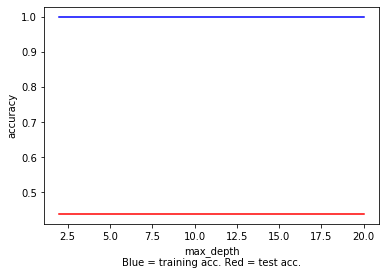

In [107]:
import matplotlib.pyplot as plt

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

In [111]:
from sklearn.model_selection import GridSearchCV
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 2),
          'min_samples_leaf': range(2, 6, 9)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=3)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

ValueError: n_splits=3 cannot be greater than the number of members in each class.

In [ ]:
# grid search CV #2
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 6),
          'min_samples_leaf': range(40, 55)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=3)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

In [ ]:

def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    for i in indices:
        print(feature_names[i], ':', importances[i])

def visualize_decision_tree(dm_model, feature_names, save_name):
    dotfile = StringIO()
    export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph[0].write_png(save_name) # saved in the following file

In [109]:
# do the feature importance and visualization analysis on GridSearchCV's best model
from dm_tools import analyse_feature_importance, visualize_decision_tree

analyse_feature_importance(cv.best_estimator_, X.columns, 20)
visualize_decision_tree(cv.best_estimator_, X.columns, "lab2_optimal_tree.png")

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [143]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import sys, getopt
import csv
url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
res = requests.get(url)
## The next two lines get around the issue with comments breaking the parsing.
comm = re.compile("<!--|-->")
soup = BeautifulSoup(comm.sub("",res.text),'lxml')
all_tables4 = soup.findAll("tbody")

In [144]:
##Squad Standard Stats
column11 = ['Team', 'Pl', 'Poss', 'Gls', 'Ast', 'PK', 'CrdY', 'CrdR']
df11 = []
df11 = pd.DataFrame(columns = column11)
rows11 = all_tables[2].find_all('tr')
for i in range(0, len(rows11)):
    Team = rows11[i].th.text
    Pl = rows11[i].find('td',{'data-stat':'players_used'}).text
    Poss = rows11[i].find('td',{'data-stat':'possession'}).text
    Gls = rows11[i].find('td',{'data-stat':'goals'}).text
    Ast = rows11[i].find('td',{'data-stat':'assists'}).text
    PK = rows11[i].find('td',{'data-stat':'pens_made'}).text
    CrdY= rows11[i].find('td',{'data-stat':'cards_yellow'}).text
    CrdR = rows11[i].find('td',{'data-stat':'cards_red'}).text
    values11 = [Team, Pl, Poss, Gls, Ast, PK, CrdY, CrdR]
#    print(values11)
    df11 = df11.append(pd.Series(values11,index=column11),ignore_index=True)
print(df11)


In [16]:
##Squad Goalkeeping
#all_tables[3]
rows12 = all_tables[3].find_all('tr')
column12 = ['Team', 'GA', 'SoTA', 'Saves', 'CS']
df12 = []
df12 = pd.DataFrame(columns = column12)
rows12 = all_tables[3].find_all('tr')
for i in range(0, len(rows12)):
    Team = rows12[i].th.text
    GA = rows12[i].find('td',{'data-stat':'goals_against_gk'}).text
    SoTA = rows12[i].find('td',{'data-stat':'shots_on_target_against'}).text
    Saves = rows12[i].find('td',{'data-stat':'saves'}).text
    CS = rows12[i].find('td',{'data-stat':'clean_sheets'}).text
    values12 = [Team, GA, SoTA, Saves, CS]
#    print(values12)
#    break
    df12 = df12.append(pd.Series(values12,index=column12),ignore_index=True)
print(df12)

               Team  GA SoTA Saves  CS
0           Arsenal  41  155   116   8
1       Aston Villa  60  159   103   5
2       Bournemouth  50  146   100   4
3          Brighton  41  135    99   7
4           Burnley  45  129    87  12
5           Chelsea  41   92    56   6
6    Crystal Palace  36  135   100  10
7           Everton  46  122    79   8
8    Leicester City  29  108    84  11
9         Liverpool  21   87    65  14
10  Manchester City  33   92    61  12
11   Manchester Utd  31  105    75   9
12    Newcastle Utd  42  155   113  10
13     Norwich City  56  157   104   5
14    Sheffield Utd  31  117    86  11
15      Southampton  55  142    91   7
16        Tottenham  41  145   109   5
17          Watford  49  134    90   9
18         West Ham  54  152   105   6
19           Wolves  34  105    71  11


In [30]:
##Squad Shooting
##all_tables[5]
rows13 = all_tables[5].find_all('tr')
column13 = ['Team', 'PK', 'Sh', 'SoT', 'FK']
df13 = []
df13 = pd.DataFrame(columns = column13)
for i in range(0, len(rows13)):
    Team = rows13[i].th.text
    PK = rows13[i].find('td',{'data-stat':'pens_made'}).text
    Sh = rows13[i].find('td',{'data-stat':'shots_total'}).text
    SoT = rows13[i].find('td',{'data-stat':'shots_on_target'}).text
    FK = rows13[i].find('td',{'data-stat':'shots_free_kicks'}).text
    values13 = [Team, PK, Sh, SoT, FK]
#    print(values13)
#    break
    df13 = df13.append(pd.Series(values13,index=column13),ignore_index=True)
print(df13)

               Team PK   Sh  SoT  FK
0           Arsenal  2  335  115  14
1       Aston Villa  1  386  125  13
2       Bournemouth  1  311   96  18
3          Brighton  1  389  122  11
4           Burnley  2  308  100  16
5           Chelsea  5  511  173  19
6    Crystal Palace  3  294   92  10
7           Everton  0  404  137  17
8    Leicester City  5  425  149  16
9         Liverpool  5  477  177  15
10  Manchester City  5  577  197  22
11   Manchester Utd  7  443  165  27
12    Newcastle Utd  0  323  103  12
13     Norwich City  2  352  109  13
14    Sheffield Utd  1  302   91   4
15      Southampton  1  417  142  23
16        Tottenham  3  372  132  16
17          Watford  4  347   96  15
18         West Ham  3  315  129  10
19           Wolves  3  394  122  11


In [34]:
##Squad Passing
##all_tables[6]
rows14 = all_tables[6].find_all('tr')
column14 = ['Team', 'Cmp', 'Att', 'CmpPert', 'TotDist', 'PrgDist']
df14 = []
df14 = pd.DataFrame(columns = column14)
for i in range(0, len(rows14)):
    Team = rows14[i].th.text
    Cmp = rows14[i].find('td',{'data-stat':'passes_completed'}).text
    Att = rows14[i].find('td',{'data-stat':'passes'}).text
    CmpPert = rows14[i].find('td',{'data-stat':'passes_pct'}).text
    TotDist = rows14[i].find('td',{'data-stat':'passes_total_distance'}).text
    PrgDist = rows14[i].find('td',{'data-stat':'passes_progressive_distance'}).text
    values14 = [Team, Cmp, Att, CmpPert, TotDist, PrgDist]
#    print(values14)
#    break
    df14 = df14.append(pd.Series(values14,index=column14),ignore_index=True)
print(df14)


               Team    Cmp    Att CmpPert TotDist PrgDist
0           Arsenal  13583  16379    82.9  265976   78747
1       Aston Villa  10054  13294    75.6  209848   73795
2       Bournemouth  10104  13352    75.7  198302   71180
3          Brighton  13467  16670    80.8  270863   87980
4           Burnley   7783  11295    68.9  160118   63312
5           Chelsea  16418  19581    83.8  319450   91020
6    Crystal Palace   9586  12679    75.6  186681   71735
7           Everton  10591  13886    76.3  224351   81653
8    Leicester City  14001  17086    81.9  268887   83831
9         Liverpool  17000  20466    83.1  347166  101842
10  Manchester City  19491  22281    87.5  377069  101125
11   Manchester Utd  13844  16871    82.1  255985   77936
12    Newcastle Utd   8295  11339    73.2  171598   66438
13     Norwich City  12031  15088    79.7  221149   72329
14    Sheffield Utd  10098  13644    74.0  203234   70527
15      Southampton   9951  13676    72.8  191164   69408
16        Tott

In [37]:
##Squad Defensive Actions
#all_tables[9]
rows15 = all_tables[9].find_all('tr')
column15 = ['Team', 'Tkl', 'TklW', 'Press', 'PressSucc', 'Block', 'Int', 'Clr', 'Err']
df15 = []
df15 = pd.DataFrame(columns = column15)
for i in range(0, len(rows15)):
    Team = rows15[i].th.text
    Tkl = rows15[i].find('td',{'data-stat':'tackles'}).text
    TklW = rows15[i].find('td',{'data-stat':'tackles_won'}).text
    Press = rows15[i].find('td',{'data-stat':'pressures'}).text
    PressSucc = rows15[i].find('td',{'data-stat':'pressure_regains'}).text
    Block = rows15[i].find('td',{'data-stat':'blocks'}).text
    Int = rows15[i].find('td',{'data-stat':'interceptions'}).text
    Clr = rows15[i].find('td',{'data-stat':'clearances'}).text
    Err = rows15[i].find('td',{'data-stat':'errors'}).text
    values15 = [Team, Tkl, TklW, Press, PressSucc, Block, Int, Clr, Err]
#    print(values15)
#    break
    df15 = df15.append(pd.Series(values15,index=column15),ignore_index=True)
print(df15)

               Team  Tkl TklW Press PressSucc Block  Int   Clr Err
0           Arsenal  499  310  5154      1362   496  272   799   9
1       Aston Villa  516  328  5107      1391   637  358   858  25
2       Bournemouth  466  282  5585      1429   578  398  1015  12
3          Brighton  559  345  4841      1481   490  326   756  12
4           Burnley  479  278  4920      1225   563  312  1025   4
5           Chelsea  615  380  5232      1589   472  371   772   7
6    Crystal Palace  596  350  5210      1386   560  371   878  10
7           Everton  639  355  5111      1396   454  339   839   6
8    Leicester City  638  395  5399      1657   486  343   862  10
9         Liverpool  518  323  4843      1544   404  288   748   7
10  Manchester City  464  295  4239      1298   368  287   526  11
11   Manchester Utd  515  303  5093      1445   510  300   755   6
12    Newcastle Utd  540  308  5155      1274   534  320   982  10
13     Norwich City  604  361  5587      1538   603  322   872

In [40]:
##Squad Possession
all_tables[10]
rows16 = all_tables[10].find_all('tr')
column16 = ['Team', 'Touches', 'SuccDri', 'TotDistCarr', 'Targ', 'Rec', 'Miscon', 'Dispos']
df16 = []
df16 = pd.DataFrame(columns = column16)
for i in range(0, len(rows15)):
    Team = rows16[i].th.text
    Touches = rows16[i].find('td',{'data-stat':'touches'}).text
    SuccDri = rows16[i].find('td',{'data-stat':'dribbles_completed'}).text
    TotDistCarr = rows16[i].find('td',{'data-stat':'carry_distance'}).text
    Targ = rows16[i].find('td',{'data-stat':'pass_targets'}).text
    Rec = rows16[i].find('td',{'data-stat':'passes_received'}).text
    Miscon = rows16[i].find('td',{'data-stat':'miscontrols'}).text
    Dispos = rows16[i].find('td',{'data-stat':'dispossessed'}).text
    values16 = [Team, Touches, SuccDri, TotDistCarr, Targ, Rec, Miscon, Dispos]
#    print(values16)
#    break
    df16 = df16.append(pd.Series(values16,index=column16),ignore_index=True)
print(df16)

               Team Touches SuccDri TotDistCarr   Targ    Rec Miscon Dispos
0           Arsenal   20012     354       81171  15661  13583    372    385
1       Aston Villa   17184     327       65412  12237  10054    362    370
2       Bournemouth   17295     292       62266  12336  10104    423    354
3          Brighton   20393     296       78550  15869  13467    396    416
4           Burnley   14985     237       44634  10227   7783    330    297
5           Chelsea   23416     400       89826  18863  16418    392    390
6    Crystal Palace   16710     368       58141  11767   9586    407    436
7           Everton   17736     326       64116  12975  10591    406    393
8    Leicester City   20997     343       76794  16192  14001    381    408
9         Liverpool   24025     359       85036  19644  17000    379    369
10  Manchester City   25444     433      104236  21516  19491    269    332
11   Manchester Utd   20619     400       85480  16005  13844    368    397
12    Newcas

In [38]:
rows16 = all_tables[10].find_all('tr')
rows16[0]

<tr><th class="left" data-stat="squad" scope="row"><a href="/en/squads/18bb7c10/Arsenal">Arsenal</a></th><td class="right" data-stat="players_used">28</td><td class="center" data-stat="possession">54.8</td><td class="right group_start" data-stat="touches">20012</td><td class="right" data-stat="touches_def_pen_area">2415</td><td class="right" data-stat="touches_def_3rd">7115</td><td class="right" data-stat="touches_mid_3rd">9447</td><td class="right" data-stat="touches_att_3rd">4796</td><td class="right" data-stat="touches_att_pen_area">801</td><td class="right" data-stat="touches_live_ball">18506</td><td class="right group_start" data-stat="dribbles_completed">354</td><td class="right" data-stat="dribbles">594</td><td class="right" data-stat="dribbles_completed_pct">59.6</td><td class="right" data-stat="players_dribbled_past">378</td><td class="right" data-stat="nutmegs">25</td><td class="right group_start" data-stat="carries">13701</td><td class="right" data-stat="carry_distance">8117